In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('walmart.csv')
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Plotting ACF and PCF of by each cluster

From the Clustering result, we select the stores that belong to Cluster 1, which are following store numbers: 6, 14,15,18,19,21,22,27,29 and 35

The goal is to examine if the stores in this cluster share similar behavior in ACF and PCF or not. If the results are similar, it can indicates that the clustering work well and we can apply the same ARIMA model after each cluster (10 different clusters) every single store (45 stores).

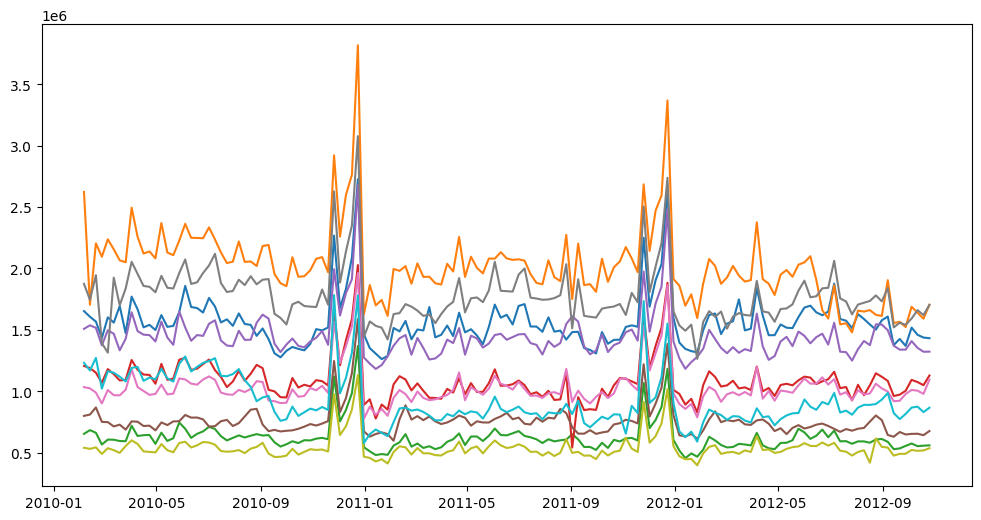

In [ ]:
# ploting all stores in the Cluster 1
cluster_1_stores_select = [6, 14,15,18,19,21,22,27,29,35]
# Filter the DataFrame for stores 37, 38, and 42
filtered_df = df[df['Store'].isin(cluster_1_stores_select)]

# Plot time series for each store
plt.figure(figsize=(12, 6))
for store in filtered_df['Store'].unique():
    store_data = filtered_df[filtered_df['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')

In [15]:
filtered_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
715,6,2010-02-05,1652635.10,0,40.43,2.572,212.622352,7.259
716,6,2010-02-12,1606283.86,1,40.57,2.548,212.770042,7.259
717,6,2010-02-19,1567138.07,0,43.58,2.514,212.816155,7.259
718,6,2010-02-26,1432953.21,0,47.10,2.561,212.845337,7.259
719,6,2010-03-05,1601348.82,0,49.63,2.625,212.874519,7.259


In [10]:
# Plot ACF and PACF
def plot_acf_pacf (sales_of_selected_store):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    plot_acf(sales_of_selected_store, lags=30, ax=ax[0], title='ACF of Differenced Data')
    plot_pacf(sales_of_selected_store, lags=30, ax=ax[1], title='PACF of Differenced Data')
    plt.show()


## ACF and PCF of store 6

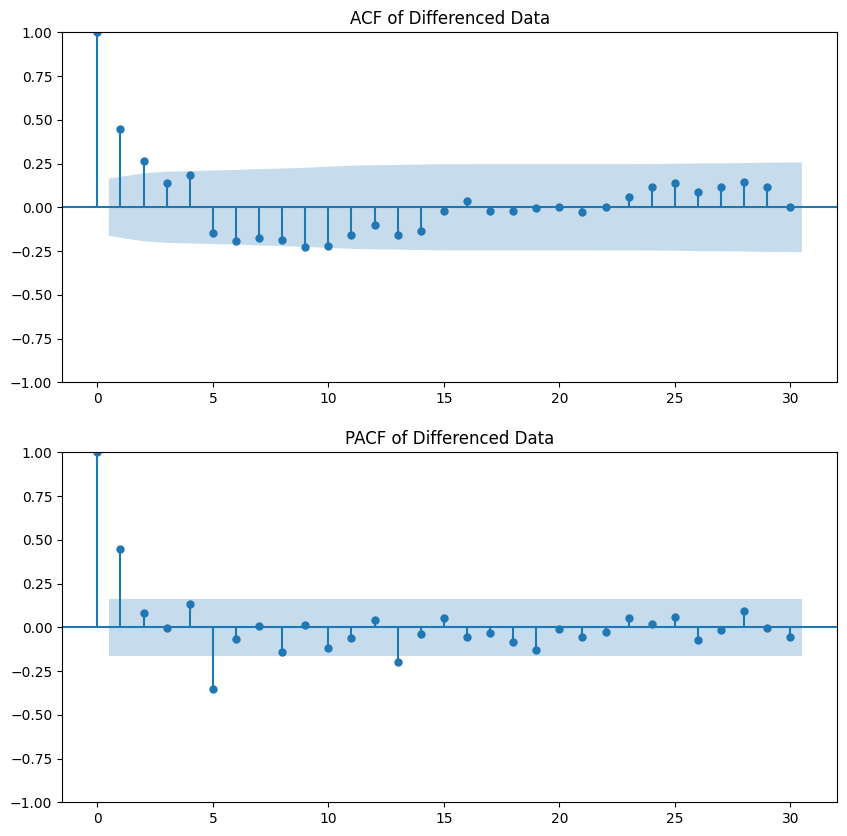

In [16]:
# Filter Weekly_Sales for Store 6
weekly_sales_store_6 = df[df['Store'] == 6]['Weekly_Sales']


plot_acf_pacf(weekly_sales_store_6)

## ACF and PCF of store 14

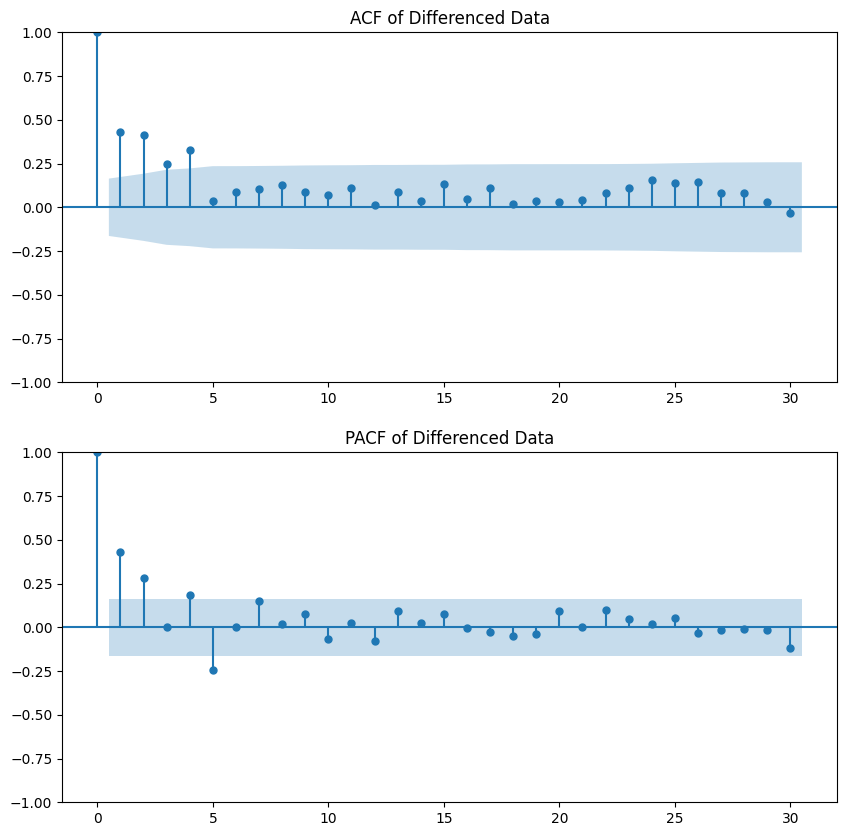

In [36]:
# Filter Weekly_Sales for Store 14
weekly_sales_store_14 = df[df['Store'] == 14]['Weekly_Sales']


plot_acf_pacf(weekly_sales_store_14)

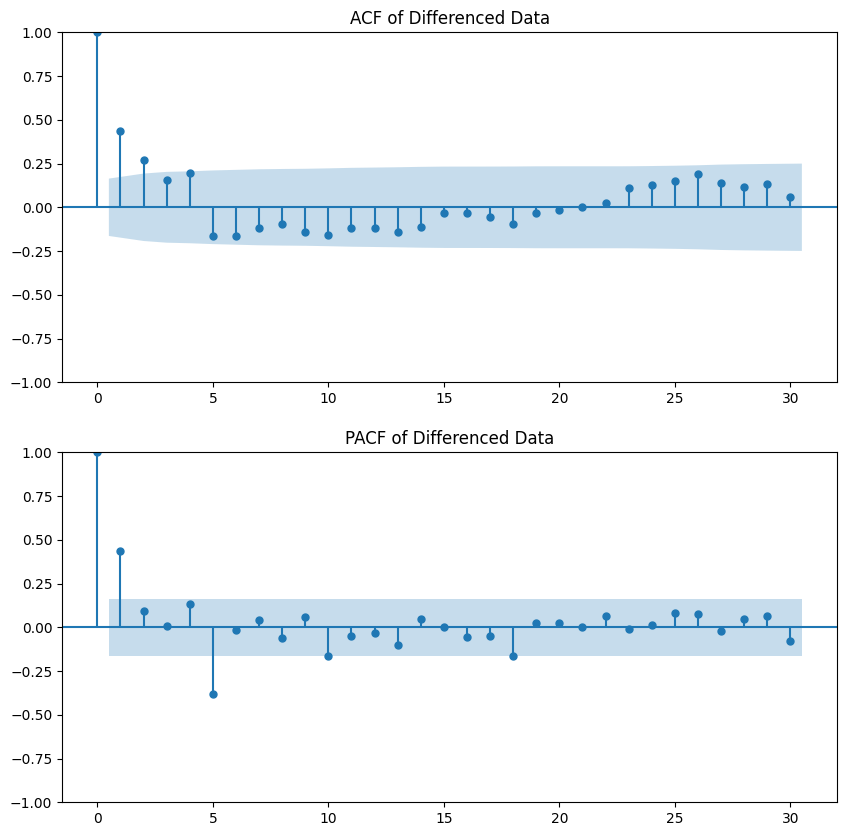

In [18]:
# Filter Weekly_Sales for Store 15
weekly_sales_store_15 = df[df['Store'] == 15]['Weekly_Sales']


plot_acf_pacf(weekly_sales_store_15)

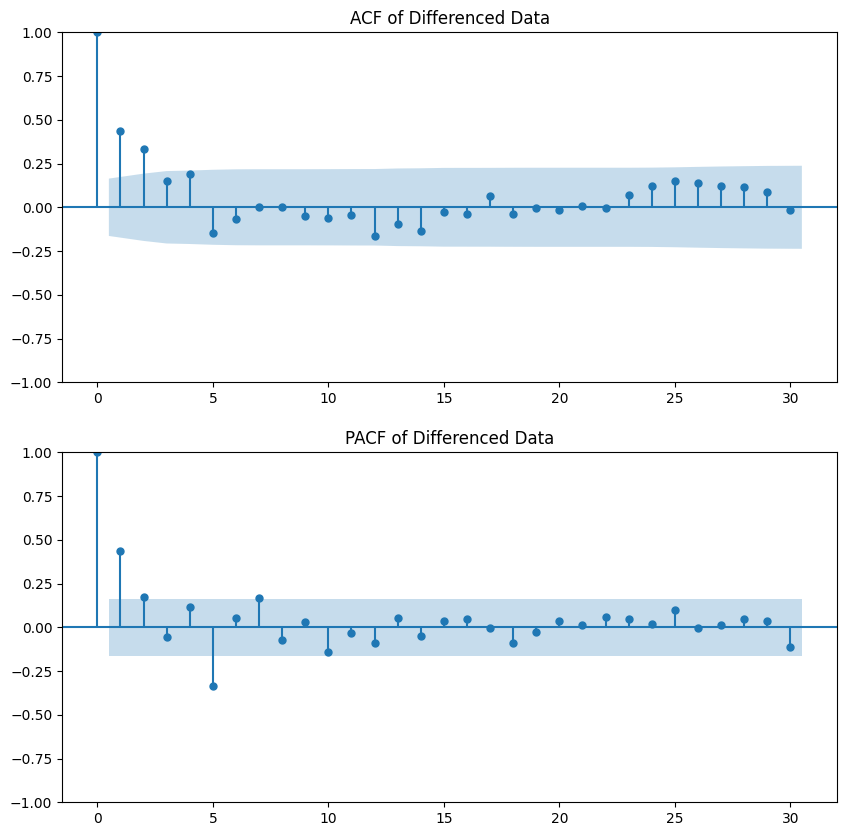

In [22]:
# Filter Weekly_Sales for Store 18
weekly_sales_store_18 = df[df['Store'] == 18]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_18)

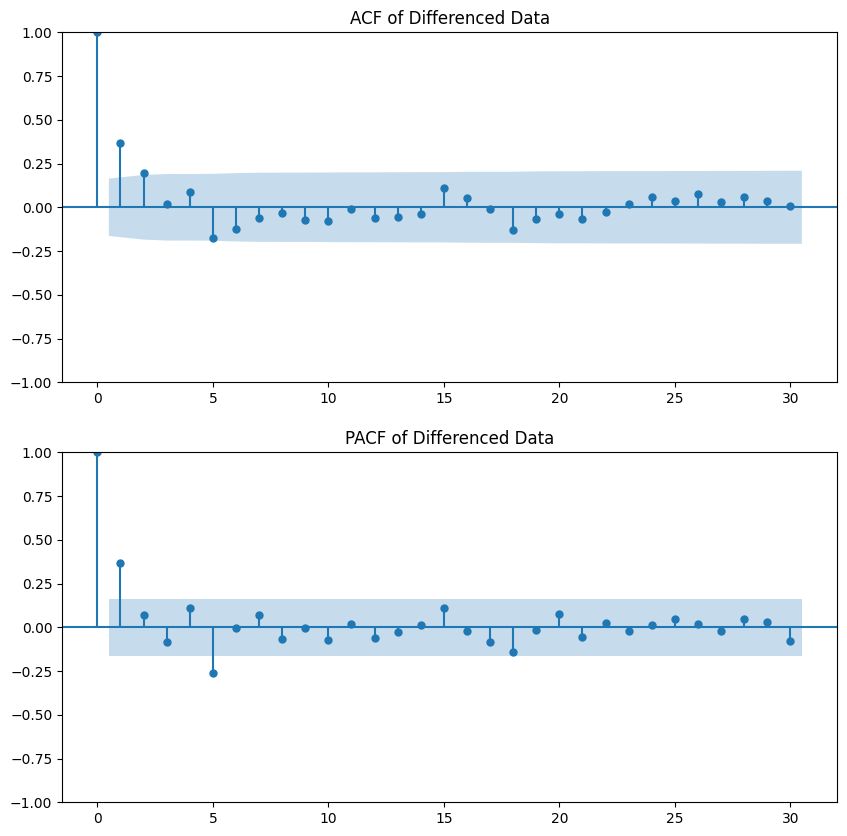

In [ ]:
# Filter Weekly_Sales for Store 19
weekly_sales_store_19 = df[df['Store'] == 19]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_19)

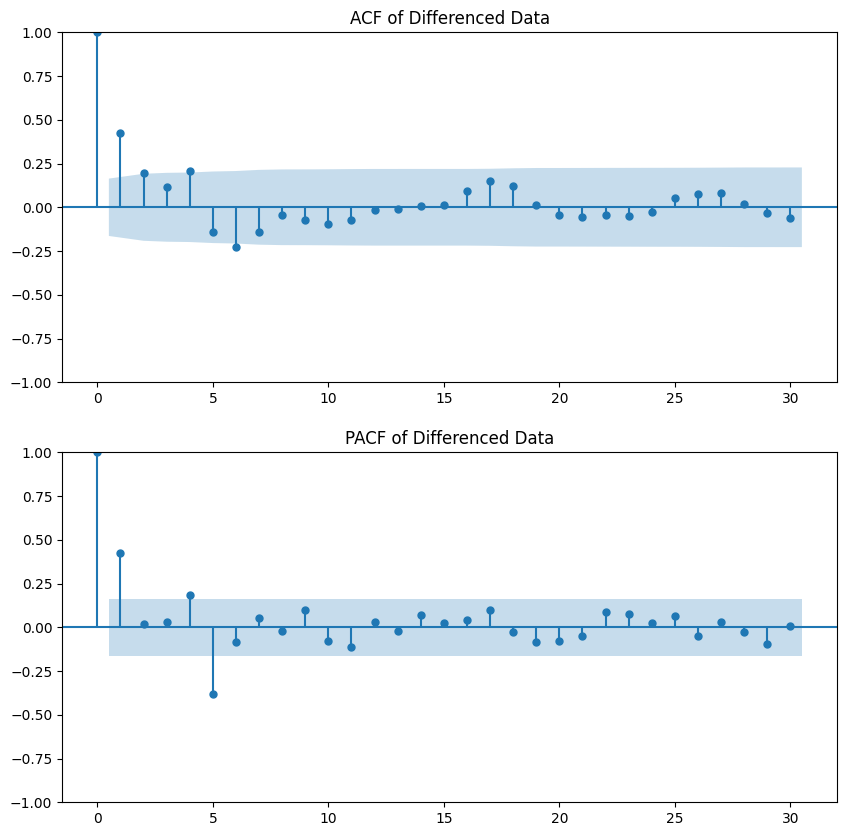

In [25]:
# Filter Weekly_Sales for Store 21
weekly_sales_store_21 = df[df['Store'] == 21]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_21)

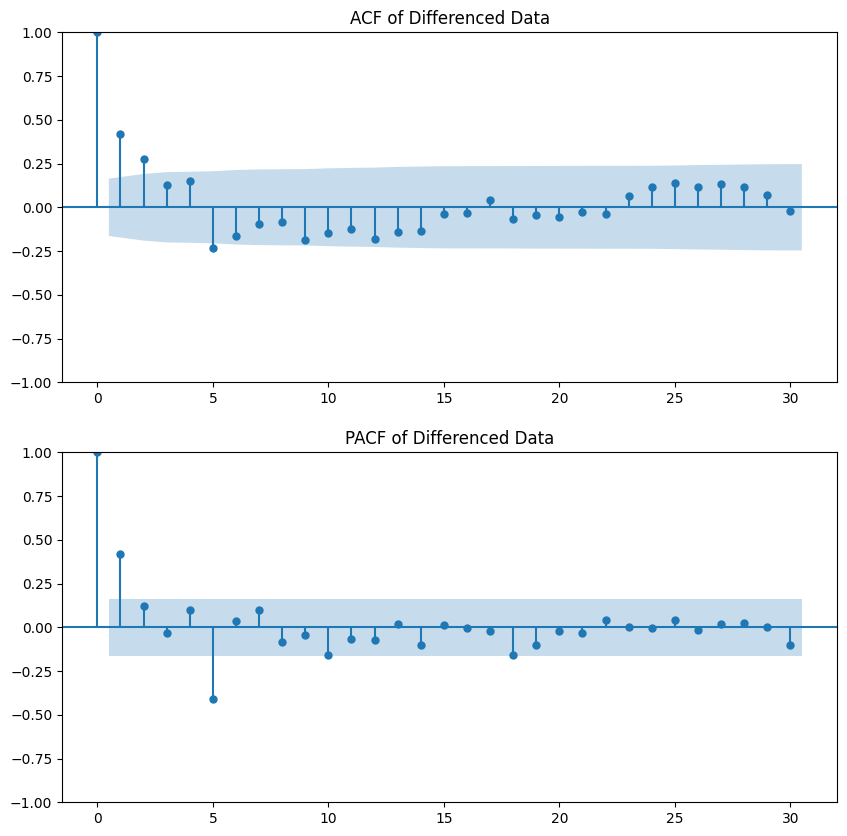

In [26]:
# Filter Weekly_Sales for Store 22
weekly_sales_store_22 = df[df['Store'] == 22]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_22)

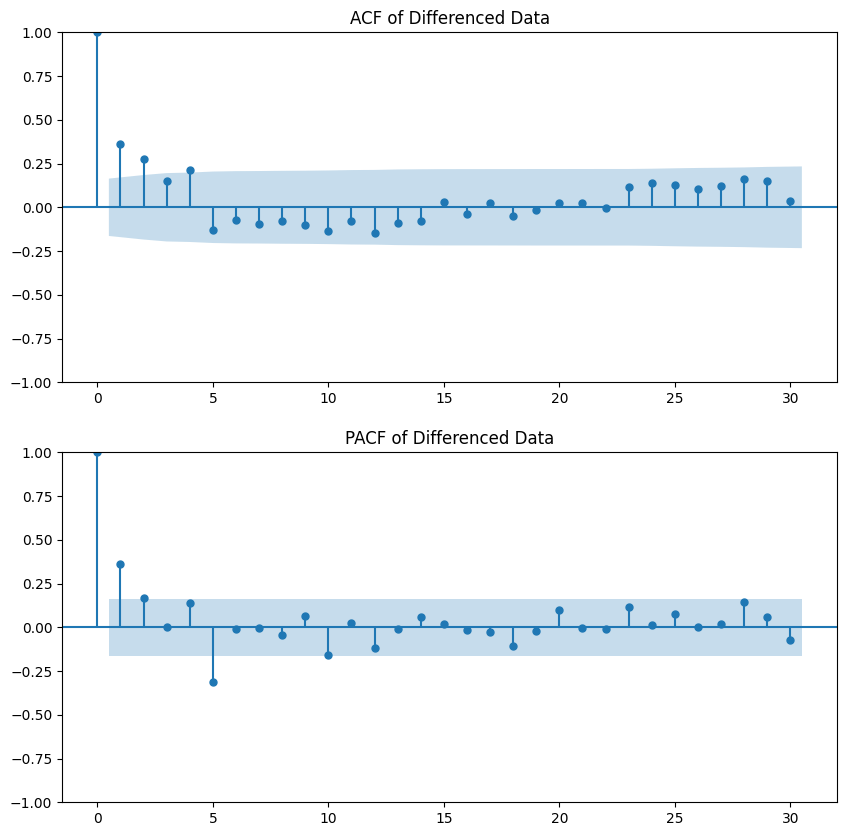

In [27]:
# Filter Weekly_Sales for Store 27
weekly_sales_store_27 = df[df['Store'] == 27]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_27)

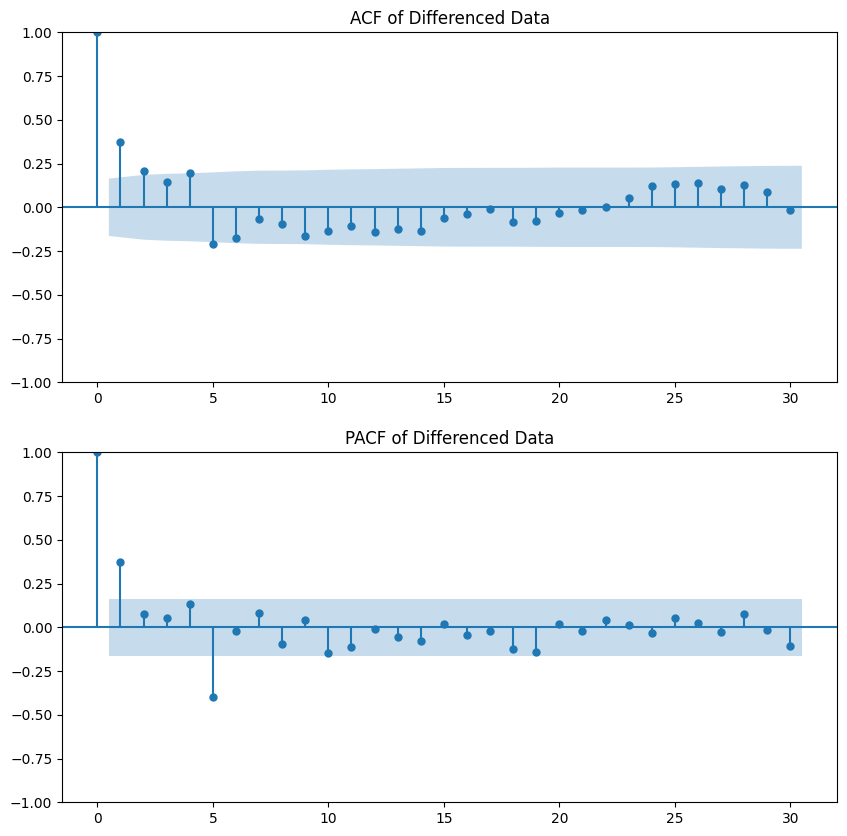

In [28]:
# Filter Weekly_Sales for Store 29
weekly_sales_store_29 = df[df['Store'] == 29]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_29)

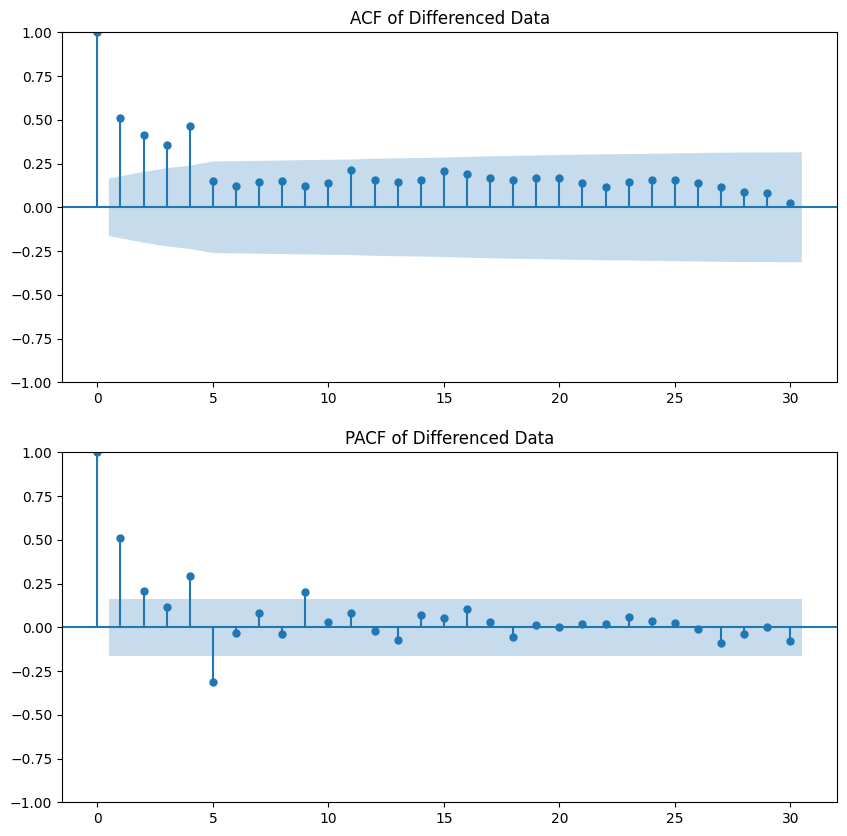

In [29]:
# Filter Weekly_Sales for Store 35
weekly_sales_store_35 = df[df['Store'] == 35]['Weekly_Sales']
plot_acf_pacf(weekly_sales_store_35)

## Conclusion

PCF: All stores share similar pattern, which has significant values at lag 1 and 5. PCF indicates AR term

ACF: All stores share similar pattern, which has significant values at lag 1 (store 35 also has significant values at lag 4).  PCF indicates MA term

=> we may apply the model ARIMA (1,0,1) or ARIMA (5,0,1) for this cluster.